# Лабораторная работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Комосский Егор Артемович и Рыжиков Иван Сергеевич. Вариант №6.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

- Единичный дискретный скачок определяется следующим образом:

$$ \sigma_d(k) = \begin{cases} 1, & k \geq 0 \\ 0, & k < 0 \end{cases}, k \in \mathbb{Z} $$

- Дискретный прямоугольный импульс длительностью $n_{imp}$ и амплитудой $U$ можно выразить через разность двух единичных скачков:

  $$
  s_1(k) = \begin{cases} U, & 0 \leq k < n_{imp} \\ 0, & \text{иначе} \end{cases} = U \cdot (\sigma_d(k) - \sigma_d(k - n_{imp}))
  $$

- Линейная комбинация $ s(k) $ дискретный сигналов $ x_1(k), x_2(k), ..., x_{n}(k) $ выражается как
$ s(k) = \sum_{i = 1}^{n} a_i x_i(k)$, 
где $a_i$ - вес сигнала $ x_i(k) $, характеризующий его вклад в итоговый сигнал $ s(k) $.

- Среднее значение дискретного сигнала $ s(k) $ определяется как
$$ \bar{s} = \frac{1}{N} \sum_{k=0}^{N-1} s(k) $$
- Энергия дискретного сигнала $ s(k) $ определяется как сумма квадратов его значений:
$$ E = \sum_{k=0}^{N-1} |s(k)|^2 $$
- Мощность дискретного сигнала $ s(k) $ определяется как среднее значение его энергии на один отсчет:
  $$ P = \frac{E}{N} = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2 $$

- Дискретный сигнал с экспоненциальной огибающей $|a|^k$:
$$ s^\prime(k) = s(k) \cdot |a|^k, |a| < 1 $$



## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [1]:
# Импорт необходимых библиотек
import math
import numpy as np
import matplotlib.pyplot as plt



In [2]:
Nb = 6
"""Номер бригады"""

N = 30 + Nb % 5
"""Длина последовательности"""

a = (-1) ** (Nb) * (0.8 + 5e-3 * (Nb % 20))
"""Основание экспоненты"""

C = 1 + Nb % 5
"""Амплитуда гармонического сигнала"""

w0 = math.pi / (6 + Nb % 5)
"""Частота гармонического сигнала"""

U = Nb % 20 + 1
"""Амплитуда импульса"""

n0 = 3 + Nb % 5
"""Начальный момент импульса"""

n_imp = 5 + Nb % 5
"""Длина импульса"""

B1 = 1.5 + Nb % 5
"""Амплитуда гармонического сигнала 1"""
B2 = 5.7 - Nb % 5
"""Амплитуда гармонического сигнала 2"""
B3 = 2.2 + Nb % 5
"""Амплитуда гармонического сигнала 3"""

w1 = math.pi / (4 + Nb % 5)
"""Частота гармонического сигнала 1"""
w2 = math.pi / (8 + Nb % 5)
"""Частота гармонического сигнала 2"""
w3 = math.pi / (16 + Nb % 5)
"""Частота гармонического сигнала 3"""

a1 = 1.5 - Nb % 5
"""Коэффициент 1 линейной комбинации гармонических сигналов"""
a2 = 0.7 + Nb % 5
"""Коэффициент 2 линейной комбинации гармонических сигналов"""
a3 = 1.4 + Nb % 5
"""Коэффициент 3 линейной комбинации гармонических сигналов"""

Nb, N, a, C, w0, U, n0, n_imp, B1, B2, B3, w1, w2, w3, a1, a2, a3

(6,
 31,
 0.8300000000000001,
 2,
 0.4487989505128276,
 7,
 4,
 6,
 2.5,
 4.7,
 3.2,
 0.6283185307179586,
 0.3490658503988659,
 0.18479956785822313,
 0.5,
 1.7,
 2.4)

### Задание 1

Смоделировать дискретный прямоугольный импульс:

$$ 
s_1(k) = \begin{cases} 
U, & \quad n_0 \leq k \leq n_0 + n_{imp} - 1; \\ 
0, & \quad \text{иначе}
\end{cases} 
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N - 1]$. Пояснить, как выполняется моделирование импульса.

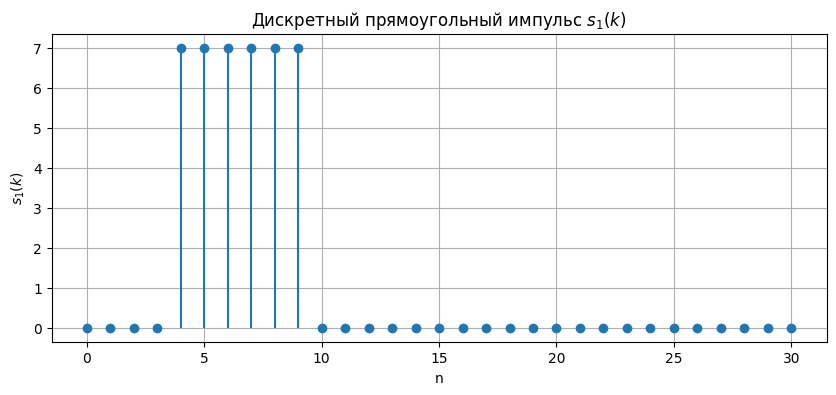

In [3]:
# Дискретное время
n = np.arange(0, N)

# Дискретный единичный скачок
def sigma_d(k):
    return (k >= 0).astype(float)

# Моделирование импульса
s1 = U * (sigma_d(n - n0) - sigma_d(n - (n0 + n_imp)))

# График импульса
plt.figure(figsize=(10,4))
plt.stem(n, s1, basefmt=" ")
plt.title(r"Дискретный прямоугольный импульс $s_1(k)$")
plt.xlabel("n")
plt.ylabel(r"$s_1(k)$")
plt.grid(True)
plt.show()


Дискретный прямоугольный импульс можно смоделировать как разность двух дискретных единичных скачков, сдвинутых на соответствующие значения:

$$
s_1(k) = U \cdot (\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp})))
$$

Первый скачок $\sigma_d(k - n_0)$ создает начало импульса на позиции $n_0$, а второй скачок $\sigma_d(k - (n_0 + n_{imp}))$ создает конец импульса на позиции $n_0 + n_{imp}$. Таким образом, разность этих двух скачков формирует прямоугольный импульс с единичной амплитуды и длительностью $n_{imp}$. Умножение на амплитуду $U$ задает высоту импульса.


### Задание 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k),
$$

где


$$
x_i(k) = B_i \sin(\hat{\omega_i}k), \quad i = 1,2,3
$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале
времени $n \in [0, N - 1]$ Вычислить среднее значение (идентификатор `mean_s2`), энергию (идентификатор `E`) и среднюю мощность последовательности $s_2(k)$ (идентификатор `P`).

Пояснить:

1) Операции при моделировании линейной комбинации сигналов $ s_2(k) $;
2) Как определяют указанные характеристики.


mean_s2 = 0.852638
E       = 9481.969924
P       = 61.571233


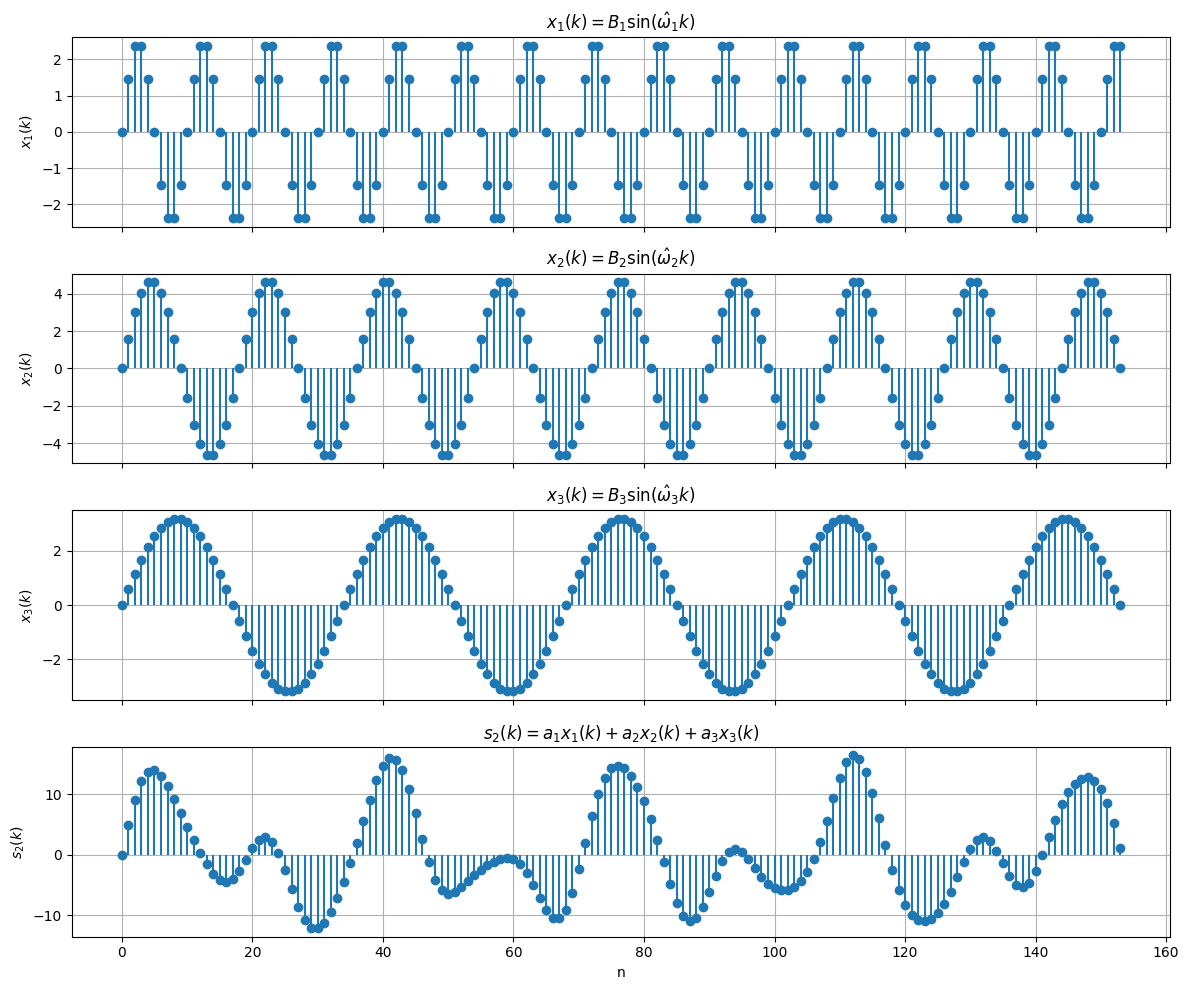

In [4]:
n = np.arange(0, 5 * N - 1)

# Три гармонические последовательности
x1 = B1 * np.sin(w1 * n)
x2 = B2 * np.sin(w2 * n)
x3 = B3 * np.sin(w3 * n)

# Линейная комбинация
s2 = a1 * x1 + a2 * x2 + a3 * x3

# Характеристики
mean_s2 = float(np.mean(s2))  # среднее значение
E = float(np.sum(s2**2))  # энергия
P = float(E / len(s2))  # средняя мощность

# Печать численных результатов
print(f"mean_s2 = {mean_s2:.6f}")
print(f"E       = {E:.6f}")
print(f"P       = {P:.6f}")

# Графики гармонических сигналов и их линейной комбинации
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].stem(n, x1, basefmt=" ")
axs[0].set_title(r"$x_1(k) = B_1 \sin(\hat{\omega}_1 k)$")
axs[0].set_ylabel(r"$x_1(k)$")
axs[0].grid(True)

axs[1].stem(n, x2, basefmt=" ")
axs[1].set_title(r"$x_2(k) = B_2 \sin(\hat{\omega}_2 k)$")
axs[1].set_ylabel(r"$x_2(k)$")
axs[1].grid(True)

axs[2].stem(n, x3, basefmt=" ")
axs[2].set_title(r"$x_3(k) = B_3 \sin(\hat{\omega}_3 k)$")
axs[2].set_ylabel(r"$x_3(k)$")
axs[2].grid(True)

axs[3].stem(n, s2, basefmt=" ")
axs[3].set_title(r"$s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$")
axs[3].set_xlabel("n")
axs[3].set_ylabel(r"$s_2(k)$")
axs[3].grid(True)

plt.tight_layout()
plt.show()

При моделировании линейной комбинации сигналов $s_2(k)$ выполняются следующие операции:

1. Генерация трех дискретных гармонических сигналов $x_1(k)$, $x_2(k)$ и $x_3(k)$ с заданными амплитудами $B_i$ и угловыми частотами $\hat{\omega_i}$.
2. Масштабирование каждого сигнала на соответствующий коэффициент $a_i$, что позволяет регулировать вклад каждого гармонического компонента в итоговый сигнал.
3. Сложение масштабированных сигналов для получения результирующей последовательности $s_2(k)$. При этом в зависимости от фаз, частот и амплитуд исходных сигналов могут возникать эффекты интерференции, усиливающие или ослабляющие определенные частоты в итоговом сигнале. При совпадении знаков значений сигналов происходит усиление, а при противоположных знаках - ослабление.

Среднее значение, энергия и средняя мощность последовательности $s_2(k)$ определяются следующим образом:

- Среднее значение (`mean_s2`):
  
  $$
  \text{mean\_s2} = \frac{1}{5N} \sum_{k=0}^{5N-1} s_2(k)
  $$
- Энергия (`E`):
  $$
  E = \sum_{k=0}^{5N-1} |s_2(k)|^2
  $$

- Средняя мощность (`P`):

  $$
  P = \frac{E}{5N}
  $$

### Задание 3


Вывести график дискретного сигнала $ s_3(k) $, представляющего собой дискретный гармонический сигнал $ s(k) $

$ s(k) = C \cos(\hat{\omega_0} k) $

с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N - 1] $.

Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.



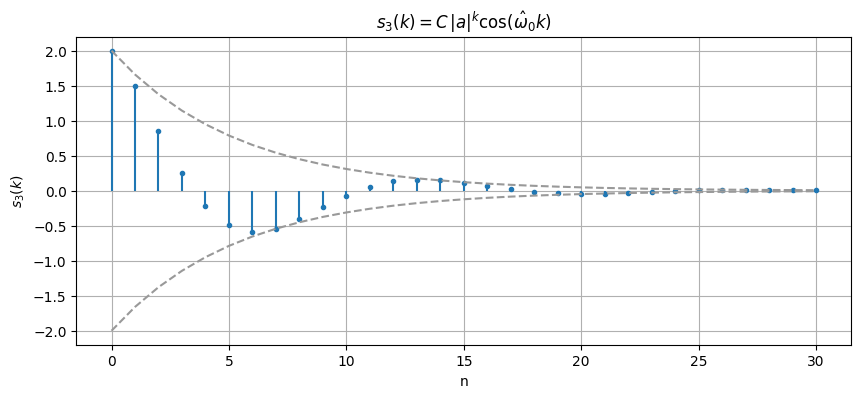

In [5]:
n = np.arange(0, N)

# Сигналы
s_pure = C * np.cos(w0 * n)            # чистая косинусоида s(k)
envelope = (a ** n)                 # |a|^k
s3 = s_pure * envelope                  # искомый сигнал

# График
plt.figure(figsize=(10,4))
plt.stem(n, s3, basefmt=" ", markerfmt=".")
plt.plot(n,  C*envelope, linestyle='dashed', color="#999999")   # верхняя огибающая
plt.plot(n, -C*envelope, linestyle='dashed', color="#999999")   # нижняя огибающая
plt.title(r"$s_3(k)=C\,|a|^k\cos(\hat{\omega}_0 k)$")
plt.xlabel("n")
plt.ylabel(r"$s_3(k)$")
plt.grid(True)
plt.show()


Дискретный сигнал $ s_3(k) $, представляющий собой дискретный гармонический сигнал с экспоненциальной огибающей, можно выразить аналитически следующим образом:

$$
s_3(k) = s(k) \cdot |a|^k = C \cos(\hat{\omega_0} k) \cdot |a|^k
$$

При моделировании дискретного сигнала $s_3(k)$ выполняются следующие операции:
1. Генерация чистого гармонического сигнала $s(k) = C \cos(\hat{\omega_0} k)$ с заданной амплитудой $C$ и угловой частотой $\hat{\omega_0}$.
2. Вычисление экспоненциальной огибающей $|a|^k$, которая определяет, как амплитуда сигнала изменяется с течением времени. Параметр $|a|$ контролирует скорость затухания или роста огибающей.
3. Умножение гармонического сигнала на экспоненциальную огибающую для получения итогового сигнала $s_3(k)$. Это создает сигнал, который колеблется с частотой $\hat{\omega_0}$, но его амплитуда изменяется в соответствии с огибающей $|a|^k$.


### Задание 4

Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.

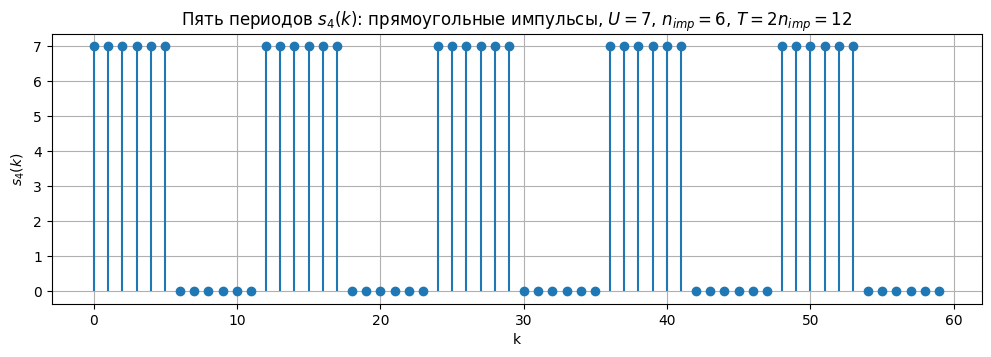

In [6]:
T = 2 * n_imp  # период вдвое больше длительности импульса: T = 12
periods = 5 # количество периодов
Nplot = periods * T # длина дискретной последовательности

# Дискретное время
n = np.arange(Nplot)


# Единичный дискретный скачок
def sigma_d(k):
    return (k >= 0).astype(float)


# Периодическая последовательность как сумма сдвинутых импульсов
s4 = np.zeros_like(n, dtype=float)
for m in range(periods):
    start = m * T
    s4 += U * (sigma_d(n - start) - sigma_d(n - (start + n_imp)))

# График
plt.figure(figsize=(12, 3.5))
plt.stem(n, s4, basefmt=" ")
plt.title(
    rf"Пять периодов $s_4(k)$: прямоугольные импульсы, $U={U}$, $n_{{imp}}={n_imp}$, $T=2n_{{imp}}={T}$"
)
plt.xlabel("k")
plt.ylabel(r"$s_4(k)$")
plt.grid(True)
plt.show()

Дискретный сигнал $s_4(k)$, представляющий собой периодическую последовательность прямоугольных импульсов, можно выразить через сумму сдвинутых дискретных прямоугольных импульсов:

$$
s_4(k) = U \cdot \sum_{m=0}^{periods-1} \left( \sigma_d\left(k - m \cdot T\right) - \sigma_d\left(k - m \cdot T - n_{imp}\right) \right)
$$

где $T = 2 \cdot n_{imp}$ - период последовательности, а $periods$ - количество периодов (в данном случае 5).



## Выводы

Освоены математическое описание и программные средства моделирования дискретных гармонических сигналов и их комбинаций, а также продемонстрированы возможности анализа их основных параметров.

В ходе работы были смоделированы различные типы дискретных сигналов: единичный скачок, прямоугольный импульс, периодическая последовательность импульсов, гармонический сигнал с экспоненциальной огибающей, а также линейная комбинация дискретных гармонических сигналов. Для каждого случая получены графики, подтверждающие теоретические зависимости.

<!-- Мы супер!!! -->
